# Handwritten Digit Recognition

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

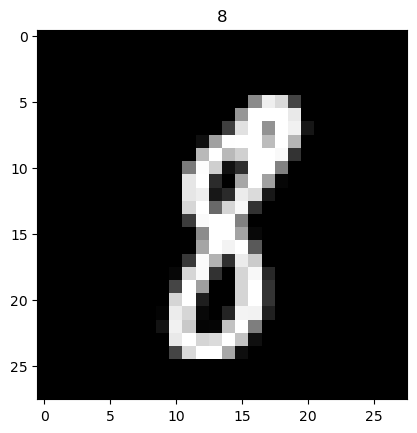

In [3]:
plt.imshow(X_train[300], cmap='gray')
plt.title(y_train[300])
plt.show()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
# reshape

X_train = X_train.reshape((-1,28,28,1))
X_train.shape

(60000, 28, 28, 1)

## Creating Model

In [7]:
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten

from keras.models import Sequential

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(filters = 4, kernel_size = (5,5), activation = 'relu' , input_shape = (28,28,1)))
model.add(AveragePooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 4, kernel_size = (7,7), activation = 'relu'))
model.add(AveragePooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(units = 10, activation = 'softmax'))

# units are 10 because output varies from 0 to 9

In [10]:
model.compile(
    loss="sparse_categorical_crossentropy", 
    optimizer="adam", 
    metrics=['accuracy']
)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 4)         104       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 4)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 4)           788       
                                                                 
 average_pooling2d_1 (Averag  (None, 3, 3, 4)          0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 36)                0         
                                                                 
 dense (Dense)               (None, 10)                3

## Train model

In [12]:
model.fit(X_train, y_train, epochs = 1, batch_size = 1)

60000/60000 [==============================] - 122s 2ms/step - loss: 0.3849 - accuracy: 0.8875


## Test model

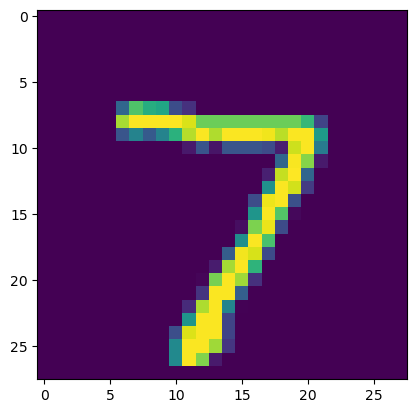

In [13]:
plt.imshow(X_test[0])

In [18]:
test = X_test[0].reshape(-1,28,28,1)

In [21]:
prediction = model.predict(test)
prediction

1/1 [==============================] - 0s 15ms/step


array([[3.6799617e-07, 2.9129513e-10, 3.0600984e-04, 1.1968145e-03,
        3.6765651e-15, 1.0688235e-06, 1.0851998e-15, 9.9846750e-01,
        6.0964112e-07, 2.7564347e-05]], dtype=float32)

In [22]:
predicted_class = np.argmax(prediction, axis=1)
predicted_class

array([7], dtype=int64)